In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

In [34]:
df = pd.read_csv('D:/MACHINE LEARNING/CSV DATASET/spam_ham_dataset.csv')

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

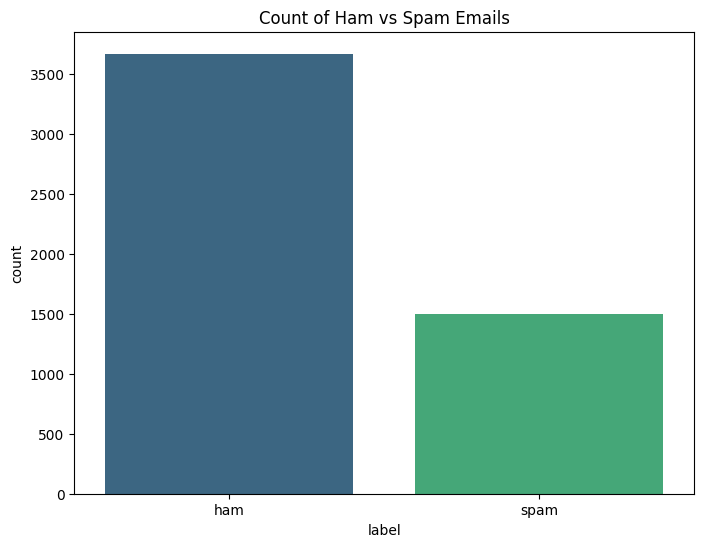

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Count of Ham vs Spam Emails')
plt.show()

ham_words = ' '.join(df[df['label'] == 'ham']['text'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

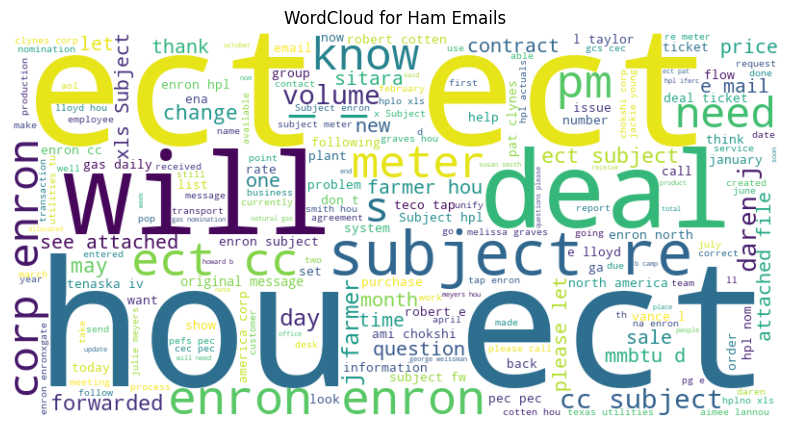

In [36]:
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Ham Emails')
plt.show()

In [37]:
spam_words = ' '.join(df[df['label'] == 'spam']['text'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_words)

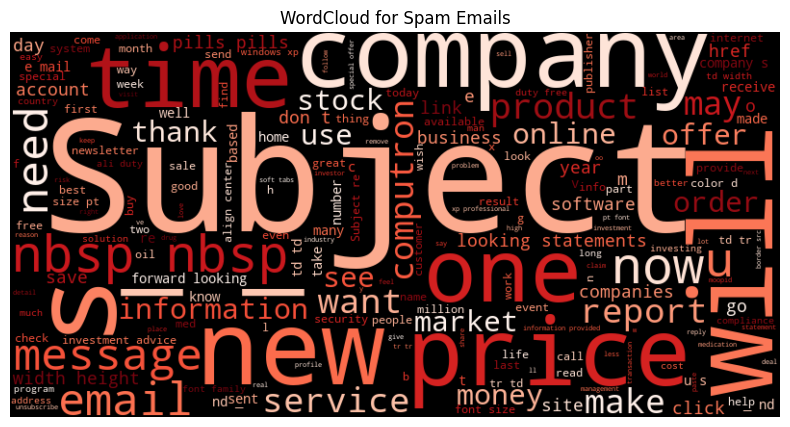

In [38]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Spam Emails')
plt.show()

In [39]:
df['label_num'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size=0.3, random_state=42)

In [41]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [42]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [43]:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9226804123711341
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1121
           1       1.00      0.72      0.84       431

    accuracy                           0.92      1552
   macro avg       0.95      0.86      0.89      1552
weighted avg       0.93      0.92      0.92      1552

Confusion Matrix:
 [[1120    1]
 [ 119  312]]


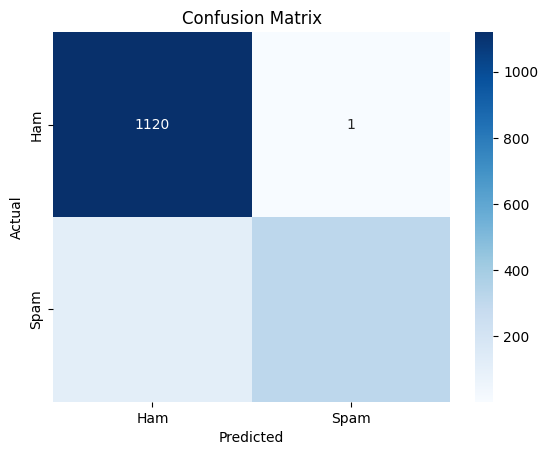

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
feature_names = vectorizer.get_feature_names_out()
class_log_prob = model.feature_log_prob_

top_10_ham = feature_names[class_log_prob[0].argsort()[-10:]]
top_10_spam = feature_names[class_log_prob[1].argsort()[-10:]]

print("\nTop 10 words predicting Ham:")
print(top_10_ham)

print("\nTop 10 words predicting Spam:")
print(top_10_spam)



Top 10 words predicting Ham:
['meter' 'gas' 'deal' '000' 'xls' 'hou' '2000' 'hpl' 'enron' 'ect']

Top 10 words predicting Spam:
['money' 'new' 'best' 'email' 'online' 'free' 'click' 'www' 'com' 'http']


In [46]:
sample_text = ["Congratulations! You've won a lottery."]
sample_text_vec = vectorizer.transform(sample_text)
prediction = model.predict(sample_text_vec)
print("Prediction for the sample text:", "Spam" if prediction[0] == 1 else "Ham")

Prediction for the sample text: Spam
